# Introduction
Le module vise à analyser et à mettre en place un algorithme de Machine Learning capable de prédire si un employé est susceptible de quitter l’entreprise en analysant plusieurs facteurs

# Importation des bibliothèques nécessaires

In [44]:
import pickle
import pandas as pd
from pandas import read_csv
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données & Exploration des données

In [45]:
df = pd.read_csv("../data/hr_data.csv")

On explore notre dataset
- Affichage des premières lignes
- Prise en connaissance des informations
- Vérifier les valeurs manquantes

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [48]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [49]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Observation :
On constate que nous n'avons pas de valeur manquante

La variable de prédiction ici c'est "Attrition"

Nous pouvons passer au process de prétraitement des données

# Prétraitement des données

Déjà examinons la colonne "Attrition"

In [50]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Etant donné que que c'est une variable non numérique, nous allons utiliser labelEncoder pour la transformer en nombre


In [51]:
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

Nous allons maintenant éliminer les variables qui ne nous serons pas utiles pour notre modèle

In [52]:
cols_to_drop = ["EmployeeNumber", "Over18", "StandardHours"]
df.drop(cols_to_drop, axis = 1, inplace = True)

Nous allons maintenant gérer les variables catégoriques

In [53]:
cat_columns = [col for col in df.columns if df[col].dtypes == "object"]

Mais avant différencions la variable de prédiction de celles d'entraînements

In [54]:
y = df.Attrition
X = df.drop(["Attrition"], axis = 1)

On encode en binaire les autres variables catégoriques

In [55]:
X = pd.get_dummies(X, columns = cat_columns, drop_first = True)

Enfin, on divise les données en train et test (données d'entrainement et données de validations) à hauteur de 80% - 20%


In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Entraînement du modèle

Choix du modèle

In [57]:
model = RandomForestClassifier(n_estimators = 100, random_state = 1)

Ajustement

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

prédictions

In [59]:
pred = model.predict(X_val)

# Evaluation du modèle

Quoi de mieux que la matrice de confusion

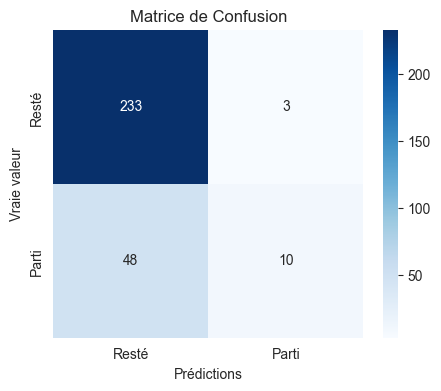

In [61]:
cm = confusion_matrix(y_val, pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Resté", "Parti"], yticklabels=["Resté", "Parti"])
plt.xlabel("Prédictions")
plt.ylabel("Vraie valeur")
plt.title("Matrice de Confusion")
plt.show()

# Conclusion
L'analyse de la matrice de confusion montre que le modèle excelle dans la prédiction des employés qui restent dans l'entreprise, avec 233 vraies prédictions positives et seulement 3 erreurs (faux positifs). Cependant, il éprouve des difficultés à identifier correctement les employés qui quittent, avec 48 faux négatifs, ce qui signifie qu'une grande partie des départs ne sont pas détectés.